# Packages

In [1]:
!pip install pandas matplotlib networkx seaborn
!pip install pyvis --quiet  # For interactive network graphs
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install langdetect
!pip install validators
!pip install vaderSentiment
!pip install scikit-learn
!pip install sentence-transformers

# first run may take 3 min and it is normal, 2nd run only need 15seconds

import pandas as pd
import spacy
import matplotlib.pyplot as plt
import networkx as nx
from pyvis.network import Network



ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ----- ---------------------------------- 1.8/12.8 MB 12.6 MB/s eta 0:00:01
     ------------- -------------------------- 4.2/12.8 MB 10.5 MB/s eta 0:00:01
     ------------------ --------------------- 5.8/12.8 MB 9.8 MB/s eta 0:00:01
     ----------------------- ---------------- 7.6/12.8 MB 9.4 MB/s eta 0:00:01
     ----------------------------- ---------- 9.4/12.8 MB 9.3 MB/s eta 0:00:01
     ----------------------------------- ---- 11.3/12.8 MB 9.3 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 9.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Dataset Import

In [19]:
import pandas as pd

# Provide the path to your Excel file
file_path = "news_excerpts_parsed.xlsx"

# Load the dataset
news_original = pd.read_excel(file_path)
news = news_original.copy()

# View the first few rows
print(news.head())
print(news.info())


                                                Link  \
0  https://edition.cnn.com/2023/09/29/business/st...   
1  https://www.channelnewsasia.com/singapore/su-w...   
2  https://edition.cnn.com/2023/05/22/tech/meta-f...   
3  https://www.channelnewsasia.com/singapore/bill...   
4  https://edition.cnn.com/2024/03/05/politics/li...   

                                                Text  
0  Starbucks violated federal labor law when it i...  
1  The first suspect to plead guilty in Singapore...  
2  Meta has been fined a record-breaking €1.2 bil...  
3  SINGAPORE: A 45-year-old man linked to Singapo...  
4  The Department of Education imposed a record $...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Link    1509 non-null   object
 1   Text    1509 non-null   object
dtypes: object(2)
memory usage: 23.7+ KB
None


In [20]:
# Provide the path to your Excel file
file_path = "wikileaks_parsed.xlsx"

# Load the dataset
wikileaks_original = pd.read_excel(file_path)
wikileaks = wikileaks_original.copy()

# View the first few rows
print(wikileaks.head())
print(wikileaks.info())

  PDF Path                                               Text
0    1.pdf  Pristina Airport – Possible administrative irr...
1    1.pdf  Investigative details\n\nIn his/her interviews...
2   10.pdf  "An interoffice memorandum providing an “outst...
3   10.pdf  "Allegation 2 & 3:\n\n(Specifically, three of ...
4   10.pdf  "When asked about this in interview, the Divis...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   PDF Path  143 non-null    object
 1   Text      143 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB
None


# Text Cleaning

In [21]:
# text_cleaning.py
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from tqdm import tqdm

def initialize_nltk():
    """
    Initialize NLTK by downloading required datasets.
    This function ensures all necessary NLTK components are available.
    """
    required_packages = ['punkt', 'stopwords', 'wordnet']
    for package in required_packages:
        try:
            nltk.download(package, quiet=True)
        except Exception as e:
            print(f"Error downloading {package}: {e}")

def clean_text(text):
    """
    Clean and normalize text data.
    
    Args:
        text (str): Input text to be cleaned
        
    Returns:
        str: Cleaned and normalized text
    """
    if pd.isna(text):  # Handle NaN values
        return ""
    
    try:
        # Convert to string if not already
        text = str(text)
        
        # Lowercase conversion
        text = text.lower()
        
        # Remove special characters and numbers, but keep apostrophes for contractions
        text = re.sub(r"[^a-z'\s]", "", text)
        
        # Tokenize
        words = word_tokenize(text)
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]
        
        # Lemmatize
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]
        
        # Join words back to text
        return " ".join(words)
    
    except Exception as e:
        print(f"Error cleaning text: {e}")
        return text  # Return original text if cleaning fails

def process_dataframe(df, text_column='Text', new_column='Cleaned_Text'):
    """
    Process an entire DataFrame by cleaning the specified text column.
    
    Args:
        df (pd.DataFrame): Input DataFrame
        text_column (str): Name of the column containing text to clean
        new_column (str): Name of the new column to store cleaned text
    
    Returns:
        pd.DataFrame: DataFrame with added cleaned text column
    """
    # Initialize NLTK components
    initialize_nltk()
    
    # Initialize tqdm for progress tracking
    tqdm.pandas(desc=f"Cleaning {text_column}")
    
    # Create a copy of the DataFrame to avoid modifying the original
    df_processed = df.copy()
    
    # Clean the text column
    print(f"Cleaning text in '{text_column}' column...")
    df_processed[new_column] = df_processed[text_column].progress_apply(clean_text)
    
    return df_processed

if __name__ == "__main__":
    # Example usage
    news = process_dataframe(news)
    wikileaks = process_dataframe(wikileaks)

Cleaning text in 'Text' column...


Cleaning Text: 100%|██████████| 1509/1509 [00:00<00:00, 1937.29it/s]


Cleaning text in 'Text' column...


Cleaning Text: 100%|██████████| 143/143 [00:00<00:00, 1579.78it/s]


# Validation

In [22]:
# Import necessary libraries
from langdetect import detect
from tqdm import tqdm
import validators
import requests

# Ensure consistent language detection
from langdetect import DetectorFactory
DetectorFactory.seed = 0

# Validation function
def validate_data(news):
    original_rows = len(news)

    # Check for missing values in the cleaned 'Text' column
    news = news.dropna(subset=['Text'])
    rows_removed_missing = original_rows - len(news)

    # Check for empty strings
    news['content_length'] = news['Text'].apply(len)
    news = news[news['content_length'] > 0]
    rows_removed_empty = original_rows - len(news) - rows_removed_missing

    # Remove duplicates in the 'Text' column
    original_rows = len(news)
    news = news.drop_duplicates(subset=['Text'], keep='first')
    rows_removed_duplicates = original_rows - len(news)

    # Check for valid text length after cleaning
    min_length, max_length = 10, 10000  # Adjusted for cleaned text
    news = news[(news['content_length'] >= min_length) & (news['content_length'] <= max_length)]
    rows_removed_length = original_rows - len(news)

    print(f"Rows removed (missing): {rows_removed_missing}")
    print(f"Rows removed (empty): {rows_removed_empty}")
    print(f"Rows removed (duplicates): {rows_removed_duplicates}")
    print(f"Rows removed (length): {rows_removed_length}")

    return news

# Additional checks for URLs and language
def additional_checks_with_progress(news):
    tqdm.pandas(desc="Processing rows")

    # Detect language
    print("Step 1: Detecting non-English content...")
    def detect_language(text):
        try:
            return detect(text)
        except:
            return "error"

    news['language'] = news['Text'].progress_apply(detect_language)
    news['is_english'] = news['language'] == 'en'

    # Validate URL format
    print("Step 2: Validating URL format...")
    def is_format_valid(url):
        try:
            return validators.url(url.strip()) is True
        except:
            return False

    news['valid_format'] = news['Link'].progress_apply(is_format_valid)

    # Check accessibility only for invalid format links
    print("Step 3: Checking accessibility of URLs with invalid format...")
    def is_accessible(url):
        try:
            if not url.startswith(("http://", "https://")):
                url = "http://" + url
            response = requests.get(url, timeout=5)
            return response.status_code < 400
        except:
            return False

    # Only check accessibility for invalid format URLs
    news['accessible'] = news.apply(
        lambda row: is_accessible(row['Link']) if not row['valid_format'] else True, axis=1
    )

    # Filter the final DataFrame based on validity and language
    news = news[news['is_english'] & news['accessible']]

    print("Validation completed.")
    return news

# Validate and clean data
print("Validating dataset...")
news = validate_data(news)
news = additional_checks_with_progress(news)

# Display cleaned data
print(news)


Validating dataset...
Rows removed (missing): 0
Rows removed (empty): 0
Rows removed (duplicates): 0
Rows removed (length): 0
Step 1: Detecting non-English content...


Processing rows: 100%|██████████| 1509/1509 [00:02<00:00, 619.32it/s]


Step 2: Validating URL format...


Processing rows: 100%|██████████| 1509/1509 [00:00<00:00, 80186.55it/s]


Step 3: Checking accessibility of URLs with invalid format...
Validation completed.
                                                   Link  \
0     https://edition.cnn.com/2023/09/29/business/st...   
1     https://www.channelnewsasia.com/singapore/su-w...   
2     https://edition.cnn.com/2023/05/22/tech/meta-f...   
3     https://www.channelnewsasia.com/singapore/bill...   
4     https://edition.cnn.com/2024/03/05/politics/li...   
...                                                 ...   
1504  https://www.channelnewsasia.com/commentary/mal...   
1505  https://www.channelnewsasia.com/singapore/tick...   
1506     https://www.bbc.com/news/world-europe-57965260   
1507  https://www.bbc.com/news/uk-wales-mid-wales-13...   
1508  https://www.straitstimes.com/singapore/parliam...   

                                                   Text  \
0     Starbucks violated federal labor law when it i...   
1     The first suspect to plead guilty in Singapore...   
2     Meta has been fined a re

# Fake Extraction, Categorisation and Sentiment Analysis (Run this one to save time)

In [23]:
# Load the processed Excel files
processed_news = pd.read_excel("processed_news_excerpts_parsed.xlsx")
processed_wikileaks = pd.read_excel("processed_wikileaks_parsed.xlsx")

# Copy the 'Category' column to the respective DataFrames
news['entities'] = processed_news['entities']
news['relationships'] = processed_news['relationships']
wikileaks['entities'] = processed_wikileaks['entities']
wikileaks['relationships'] = processed_wikileaks['relationships']
news['Category'] = processed_news['Category']
wikileaks['Category'] = processed_wikileaks['Category']
news['entity_sentiments'] = processed_news['entity_sentiments']
wikileaks['entity_sentiments'] = processed_wikileaks['entity_sentiments']

print(news.columns)
print(wikileaks.columns)

Index(['Link', 'Text', 'Cleaned_Text', 'content_length', 'language',
       'is_english', 'valid_format', 'accessible', 'entities', 'relationships',
       'Category', 'entity_sentiments'],
      dtype='object')
Index(['PDF Path', 'Text', 'Cleaned_Text', 'entities', 'relationships',
       'Category', 'entity_sentiments'],
      dtype='object')


# Extract Entities and Relationships

In [6]:
from tqdm import tqdm
import spacy
import pandas as pd

# Load SpaCy model
nlp = spacy.load("en_core_web_trf")
# Enhanced tqdm display
tqdm.pandas()

# Expanded entity normalization mapping
entity_mapping = {
    "Twitter": ("Twitter", "ORG"),
    "World Cup": ("World Cup", "EVENT"),
    "world cup": ("World Cup", "EVENT"),
    "Biden": ("Joe Biden", "PERSON"),
    "Joe Biden": ("Joe Biden", "PERSON"),
    "Trump": ("Donald Trump", "PERSON"),
    "Donald Trump": ("Donald Trump", "PERSON"),
    "US": ("United States", "GPE"),
    "United States": ("United States", "GPE"),
    "COVID-19": ("COVID-19", "EVENT")
}

def normalize_entities(entities):
    """
    Normalize entities using the mapping and merge duplicates.
    """
    normalized = []
    for text, label in entities:
        # Look up entity in the mapping (case-insensitive match)
        for key, value in entity_mapping.items():
            if text.lower() == key.lower():
                normalized.append(value)
                break
        else:
            # Keep the original if no match is found
            normalized.append((text, label))
    return list(set(normalized))  # Deduplicate entities

def extract_entities(text):
    """
    Extract and normalize entities from the text.
    """
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return normalize_entities(entities)

def extract_relationships(text):
    """
    Extract relationships based on dependency parsing.
    """
    doc = nlp(text)
    relationships = []
    for token in doc:
        if token.dep_ in ("nsubj", "dobj") and token.head.pos_ == "VERB":
            relationships.append((token.text, token.head.text, token.head.i))
    return relationships


# Preprocess and store preprocessed Text in a temporary DataFrame
def preprocess_text(df):
    temp_df = df.copy()
    temp_df['Preprocessed_Text'] = temp_df['Text'].str.replace(r'\bthe\b', '', regex=True, case=False).str.strip()
    return temp_df[['Text', 'Preprocessed_Text']]

# Preprocessing
print("Preprocessing 'news' DataFrame...")
preprocessed_news = preprocess_text(news)

print("Preprocessing 'wikileaks' DataFrame...")
preprocessed_wikileaks = preprocess_text(wikileaks)

# Extract entities and relationships using the preprocessed text
print("Processing entities and relationships for 'news' DataFrame...")
news['entities'] = preprocessed_news['Preprocessed_Text'].progress_apply(extract_entities)
news['relationships'] = preprocessed_news['Preprocessed_Text'].progress_apply(extract_relationships)

print("Processing entities and relationships for 'wikileaks' DataFrame...")
wikileaks['entities'] = preprocessed_wikileaks['Preprocessed_Text'].progress_apply(extract_entities)
wikileaks['relationships'] = preprocessed_wikileaks['Preprocessed_Text'].progress_apply(extract_relationships)

print("Processing complete.")




c:\Users\Zhao Qixian\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Zhao Qixian\AppData\Local\Programs\Python\Python311\Lib\site-packages\thinc\shims\pytorch.py:261: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted 

Preprocessing 'news' DataFrame...
Preprocessing 'wikileaks' DataFrame...
Processing entities and relationships for 'news' DataFrame...


100%|██████████| 1508/1508 [03:52<00:00,  6.48it/s]


Processing entities and relationships for 'wikileaks' DataFrame...


100%|██████████| 143/143 [00:25<00:00,  5.72it/s]

Processing complete.


In [7]:
total_entities = news['entities'].apply(len).sum()
total_relationships = news['relationships'].apply(len).sum()

print(f"Total number of entities in news: {total_entities}")
print(f"Total number of relationships in news: {total_relationships}")

total_entities = wikileaks['entities'].apply(len).sum()
total_relationships = wikileaks['relationships'].apply(len).sum()

print(f"Total number of entities in wikileaks: {total_entities}")
print(f"Total number of relationships in wikileaks: {total_relationships}")

print(news.head)


Total number of entities in news: 18440
Total number of relationships in news: 18342
Total number of entities in wikileaks: 1803
Total number of relationships in wikileaks: 1729
<bound method NDFrame.head of                                                    Link  \
0     https://edition.cnn.com/2023/09/29/business/st...   
1     https://www.channelnewsasia.com/singapore/su-w...   
2     https://edition.cnn.com/2023/05/22/tech/meta-f...   
3     https://www.channelnewsasia.com/singapore/bill...   
4     https://edition.cnn.com/2024/03/05/politics/li...   
...                                                 ...   
1504  https://www.channelnewsasia.com/commentary/mal...   
1505  https://www.channelnewsasia.com/singapore/tick...   
1506     https://www.bbc.com/news/world-europe-57965260   
1507  https://www.bbc.com/news/uk-wales-mid-wales-13...   
1508  https://www.straitstimes.com/singapore/parliam...   

                                                   Text  \
0     Starbucks violated

# Categorisation

In [12]:
from transformers import pipeline
from tqdm import tqdm
import pandas as pd

# Load a smaller model
classifier = pipeline("zero-shot-classification", model="valhalla/distilbart-mnli-12-6")

# Refined list of candidate labels
candidate_labels = [
   "business", "law and justice", "politics", "technology and cybersecurity",
   "crime", "labor and human rights", "international relations",
   "education", "social issues"
]

# Ensure 'Category' column exists in the dataset
if "Category" not in news.columns:
   news["Category"] = None

# Process only rows where 'Category' is NaN
news_to_process = news[news["Category"].isna()]

# Batch processing for speed
batch_size = 8  # Adjust based on memory
for i in tqdm(range(0, len(news_to_process), batch_size), desc="Classifying in Batches"):
   # Get batch data
   batch_texts = news_to_process.iloc[i:i + batch_size]['Text'].tolist()
   batch_indices = news_to_process.iloc[i:i + batch_size].index

   # Classify batch
   batch_results = classifier(batch_texts, candidate_labels)
   
   # Update categories in the original DataFrame
   for idx, result in zip(batch_indices, batch_results):
       news.at[idx, 'Category'] = result['labels'][0]

# Save updated news to Excel
news.to_excel("processed_news_excerpts_parsed.xlsx", index=False)

print("Processing complete.")

Device set to use cpu
Classifying in Batches: 0it [00:00, ?it/s]


Processing complete.


In [32]:
from transformers import pipeline
from tqdm import tqdm
import pandas as pd

# Load a smaller model
classifier = pipeline("zero-shot-classification", model="valhalla/distilbart-mnli-12-6")

# Refined list of candidate labels
candidate_labels = [
   "business", "law and justice", "politics", "technology and cybersecurity",
   "crime", "labor and human rights", "international relations",
   "education", "social issues"
]

# Ensure 'Category' column exists in the dataset
if "Category" not in wikileaks.columns:
   wikileaks["Category"] = None

# Process only rows where 'Category' is NaN
wikileaks_to_process = wikileaks[wikileaks["Category"].isna()]

# Batch processing for speed
batch_size = 8  # Adjust based on memory
for i in tqdm(range(0, len(wikileaks_to_process), batch_size), desc="Classifying in Batches"):
   # Get batch data
   batch_texts = wikileaks_to_process.iloc[i:i + batch_size]['Text'].tolist()
   batch_indices = wikileaks_to_process.iloc[i:i + batch_size].index

   # Classify batch
   batch_results = classifier(batch_texts, candidate_labels)
   
   # Update categories in the original DataFrame
   for idx, result in zip(batch_indices, batch_results):
       wikileaks.at[idx, 'Category'] = result['labels'][0]

# Save updated wikileaks to Excel
wikileaks.to_excel("processed_wikileaks_parsed.xlsx", index=False)

print("Processing complete.")

c:\Users\Zhao Qixian\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Zhao Qixian\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Zhao Qixian\.cache\huggingface\hub\models--valhalla--distilbart-mnli-12-6. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode

Processing complete.


Index(['Link', 'Text', 'Cleaned_Text', 'content_length', 'language',
       'is_english', 'valid_format', 'accessible', 'entities', 'relationships',
       'Category', 'entity_sentiments'],
      dtype='object')
Index(['PDF Path', 'Text', 'Cleaned_Text', 'entities', 'relationships',
       'Category', 'entity_sentiments'],
      dtype='object')


# Network Graph

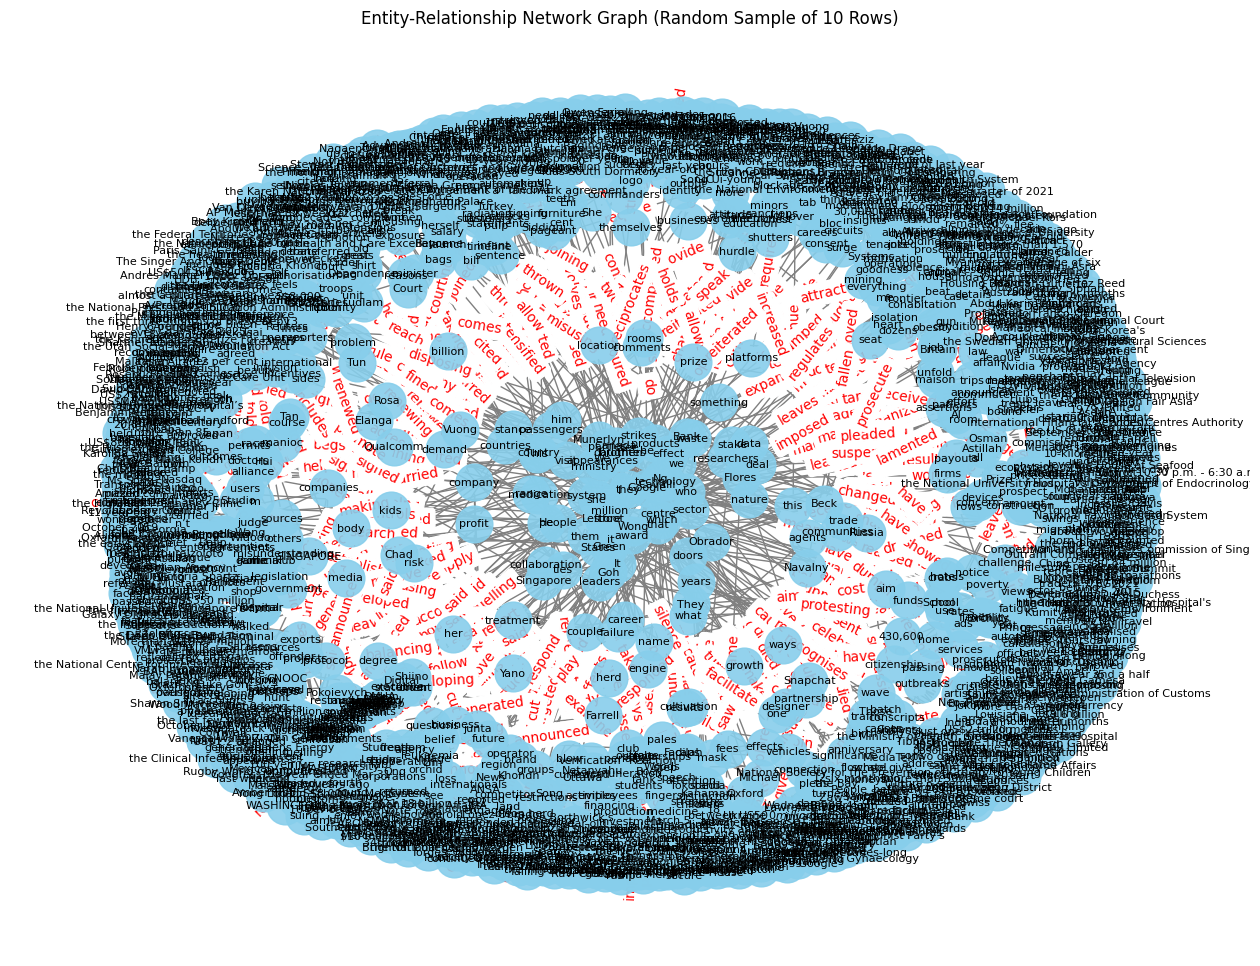

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Take a random sample of 10 rows from the dataset
random_sample = df.sample(n=10, random_state=42)  # Set random_state for reproducibility

# Initialize the graph
G = nx.DiGraph()  # Directed graph

# Function to add entities and relationships to the graph
def add_to_graph(G, entities, relationships):
    # Add nodes for entities
    for entity, label in entities:
        G.add_node(entity, label=label)
    
    # Add edges for relationships
    for subject, verb, obj_index in relationships:
        G.add_edge(subject, verb)

# Iterate over the sampled dataset to populate the graph
for _, row in random_sample.iterrows():
    entities = row['entities']
    relationships = row['relationships']
    add_to_graph(G, entities, relationships)

# Visualize the sampled graph
def visualize_network_graph(G, title="Entity-Relationship Graph (Random Sample of 10)"):
    plt.figure(figsize=(16, 12))
    pos = nx.spring_layout(G)  # Automatically position nodes
    
    # Draw nodes with labels
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', alpha=0.9)
    nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')
    
    # Draw edges with arrows
    nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=15, edge_color='gray')
    
    # Draw edge labels (optional)
    edge_labels = {(u, v): v for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    plt.title(title)
    plt.axis('off')  # Turn off the axis
    plt.show()

# Visualize the graph for the random sample
visualize_network_graph(G, title="Entity-Relationship Network Graph (Random Sample of 10 Rows)")


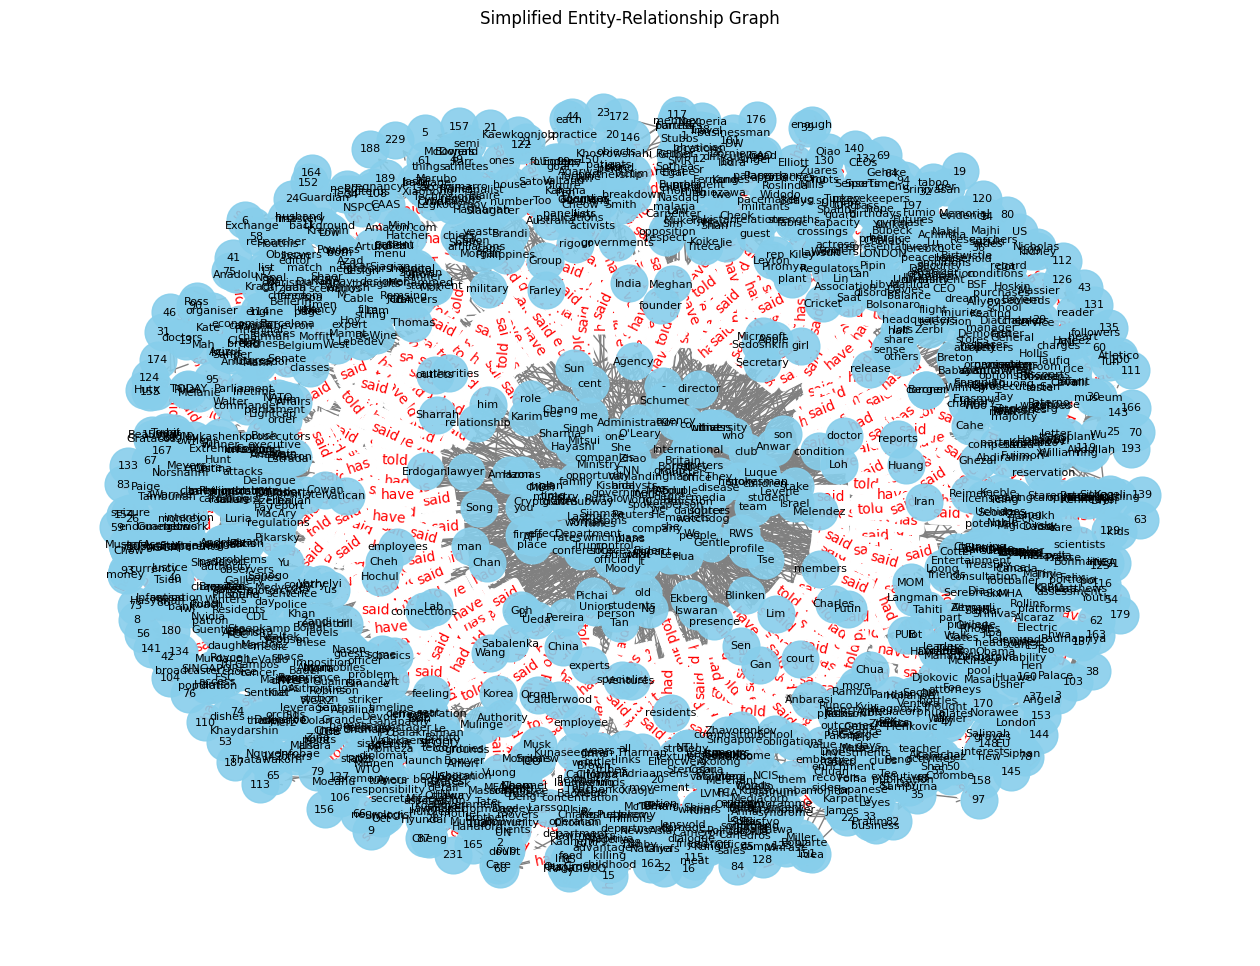

In [9]:
from pyvis.network import Network
import pandas as pd

# Take a random sample of rows which is 1 only
random_sample = df.sample(n=1, random_state=66)

# Initialize Pyvis graph
net = Network(height='800px', width='100%', directed=True, notebook=True)
net.toggle_physics(False)  # Disable physics for faster rendering

# Function to check if a node exists
def node_exists(net, node):
    return any(n['id'] == node for n in net.nodes)

# Function to add entities and relationships to the graph
def add_to_pyvis_graph(net, entities, relationships):
    # Add nodes for entities
    entity_set = set()
    for entity, label in entities:
        net.add_node(entity, label=entity, title=f"Label: {label}")
        entity_set.add(entity)
    
    # Add edges for relationships
    for subject, verb, obj_index in relationships:
        # Add subject and verb nodes dynamically if missing
        if not node_exists(net, subject):
            net.add_node(subject, label=subject, title="Auto-added Subject")
        if not node_exists(net, verb):
            net.add_node(verb, label=verb, title="Auto-added Verb")
        
        # Add edge from subject to verb
        net.add_edge(subject, verb, title=f"Relation: {verb}")
        
        # Add object if available and connect to the verb
        if obj_index is not None and obj_index < len(entities):
            obj = entities[obj_index][0]  # Get the object text
            if not node_exists(net, obj):
                net.add_node(obj, label=obj, title="Auto-added Object")
            net.add_edge(verb, obj, title="Relation: Object")


# Populate the Pyvis graph
for _, row in random_sample.iterrows():
    entities = row['entities']
    relationships = row['relationships']
    add_to_pyvis_graph(net, entities, relationships)

# Save and display the graph
net.show('entity_relationship_graph.html')


entity_relationship_graph.html


# Sentiment Analysis

For overall text sentiment

In [14]:

# pip install vaderSentiment
# if not installed then install first

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
   scores = analyzer.polarity_scores(text)
   return scores['compound']  # Overall sentiment score

news['sentiment'] = news['Text'].progress_apply(analyze_sentiment)
wikileaks['sentiment'] = wikileaks['Text'].progress_apply(analyze_sentiment)

print(news['sentiment'].head())
print(wikileaks['sentiment'].head())

100%|██████████| 143/143 [00:00<00:00, 2303.62it/s]

0    0.4019
1   -0.9442
2    0.2263
3   -0.7650
4   -0.4404
Name: sentiment, dtype: float64
0    0.9042
1    0.2023
2    0.0000
3    0.6249
4    0.0900
Name: sentiment, dtype: float64


For specific entities within each text

In [13]:
import pandas as pd
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import spacy
from tqdm import tqdm

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")
tqdm.pandas()

# Load model and tokenizer for sentiment analysis
absa_tokenizer = AutoTokenizer.from_pretrained("yangheng/deberta-v3-base-absa-v1.1", use_fast=True)
absa_model = AutoModelForSequenceClassification.from_pretrained(
   "yangheng/deberta-v3-base-absa-v1.1",
   cache_dir="./cache"
)

# Function to analyze sentiment for a specific entity
def analyze_entity_sentiment(text, entity):
   # Extract sentences mentioning the entity
   sentences = [sent.text for sent in nlp(text).sents if entity in sent.text]
   
   if not sentences:
       # If no sentences mention the entity, return neutral sentiment
       return {"entity": entity, "sentiment": "neutral", "confidence": 0.0}
   
   # Combine relevant sentences into one input for sentiment analysis
   relevant_text = " ".join(sentences)
   aspect_text = f"[CLS] {relevant_text} [SEP] {entity} [SEP]"
   inputs = absa_tokenizer(aspect_text, return_tensors="pt", truncation=True, max_length=128)

   outputs = absa_model(**inputs)
   scores = F.softmax(outputs.logits, dim=1)

   # Extract sentiment and confidence
   sentiment_idx = torch.argmax(scores).item()  # 0: negative, 1: neutral, 2: positive
   sentiment_label = ["negative", "neutral", "positive"][sentiment_idx]
   confidence = scores[0][sentiment_idx].item()

   return {"entity": entity, "sentiment": sentiment_label, "confidence": confidence}

# Function to process all entities for a row of text
def process_entities(text, entities, valid_types):
   # Remove duplicates based on both entity name and type
   unique_entities = list({(entity[0], entity[1]): entity for entity in entities}.values())

   # Filter entities of valid types
   filtered_entities = [entity for entity in unique_entities if entity[1] in valid_types]

   # Analyze sentiment for each filtered entity
   return [analyze_entity_sentiment(text, e[0]) for e in filtered_entities]

# Valid entity types to be processed
valid_types = ["PERSON", "ORG", "FAC", "GPE", "EVENT", "LAW"]

# Apply sentiment analysis to both datasets
news["entity_sentiments"] = news.progress_apply(
   lambda row: process_entities(row["Text"], row["entities"], valid_types), axis=1
)
wikileaks["entity_sentiments"] = wikileaks.progress_apply(
   lambda row: process_entities(row["Text"], row["entities"], valid_types), axis=1
)

# Print the first few rows of both datasets
print(news.head())
print(wikileaks.head())

c:\Users\Zhao Qixian\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Zhao Qixian\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
c:\Users\Zhao Qixian\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by d

KeyboardInterrupt: 

In [39]:
wikileaks.to_excel('processed_wikileaks_parsed.xlsx', index=False)
news.to_excel("processed_news_excerpts_parsed.xlsx", index=False)

# Frequency Analysis (Single dataset)

In [45]:
print(wikileaks.head)

<bound method NDFrame.head of     PDF Path                                               Text  \
0      1.pdf  Pristina Airport – Possible administrative irr...   
1      1.pdf  Investigative details\n\nIn his/her interviews...   
2     10.pdf  "An interoffice memorandum providing an “outst...   
3     10.pdf  "Allegation 2 & 3:\n\n(Specifically, three of ...   
4     10.pdf  "When asked about this in interview, the Divis...   
..       ...                                                ...   
138   89.pdf  "Description\n\nTop Secret US National Securit...   
139    9.pdf  "INTRODUCTION\n\nThis case arises out of an au...   
140    9.pdf  "BACKGROUND INFORMATION\n\nPristina Internatio...   
141    9.pdf  "BACKGROUND INFORMATION\n\nPristina Internatio...   
142   91.pdf  "Description\n\nInterception of French Ambassa...   

                                          Cleaned_Text  \
0    pristina airport possible administrative irreg...   
1    investigative detail hisher interview conduc

In [47]:
from collections import Counter

all_entities = []
all_relationships = []

# Collect entity labels
for entities_list in news['entities']:
    if isinstance(entities_list, list):
        for ent in entities_list:
            # ent should be something like ("NLRB", "ORG")
            if isinstance(ent, tuple) and len(ent) >= 2:
                all_entities.append(ent[1])  # the second element is the label

# Collect relationship types
for relationships_list in news['relationships']:
    if isinstance(relationships_list, list):
        for rel in relationships_list:
            # rel should be something like ("A", "related_to", "B")
            if isinstance(rel, tuple) and len(rel) >= 2:
                # the second element typically is the relationship type
                all_relationships.append(rel[1])

# Count occurrences
entity_counts = Counter(all_entities)
relationship_counts = Counter(all_relationships)

# Show results
print("Top 10 entity types:", entity_counts.most_common(10))
print("Top 10 relationship types:", relationship_counts.most_common(10))


Top 10 entity types: [('ORG', 3635), ('DATE', 3554), ('PERSON', 3156), ('GPE', 2981), ('CARDINAL', 1648), ('NORP', 1099), ('MONEY', 575), ('ORDINAL', 372), ('LOC', 278), ('TIME', 178)]
Top 10 relationship types: [('said', 1348), ('told', 382), ('have', 290), ('has', 267), ('had', 193), ('made', 132), ('took', 126), ('announced', 121), ('’s', 116), ('take', 112)]


In [48]:
# Adding `num_entities` and `num_relationships` to each DataFrame
news['num_entities'] = news['entities'].apply(lambda x: len(x) if isinstance(x, list) else 0)
news['num_relationships'] = news['relationships'].apply(lambda x: len(x) if isinstance(x, list) else 0)

wikileaks['num_entities'] = wikileaks['entities'].apply(lambda x: len(x) if isinstance(x, list) else 0)
wikileaks['num_relationships'] = wikileaks['relationships'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Save processed DataFrames to Excel files
news_file = "processed_news_excerpts_parsed.xlsx"
wikileaks_file = "processed_wikileaks_parsed.xlsx"

news.to_excel(news_file, index=False)
wikileaks.to_excel(wikileaks_file, index=False)

(news_file, wikileaks_file)

('processed_news_excerpts_parsed.xlsx', 'processed_wikileaks_parsed.xlsx')

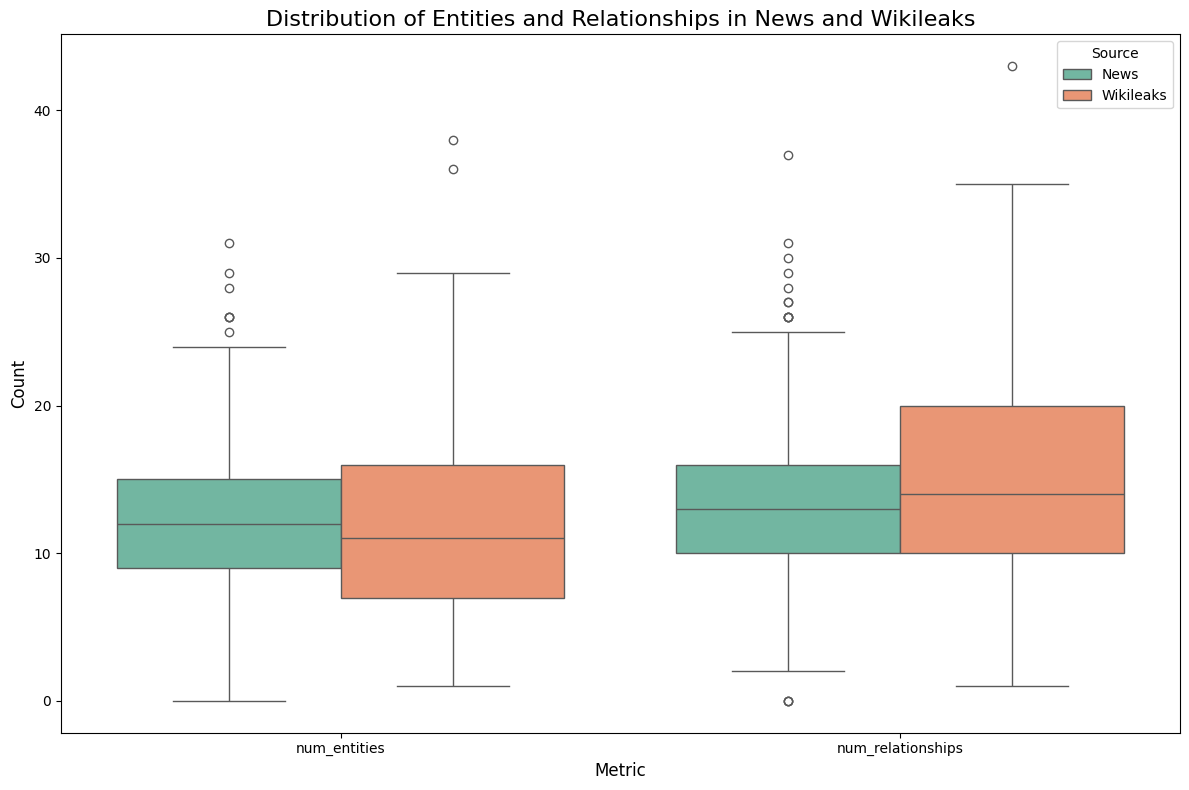

In [49]:
# Import seaborn for enhanced visualization
import seaborn as sns

# Combine the data for visualization
news['Source'] = 'News'
wikileaks['Source'] = 'Wikileaks'
combined_df = pd.concat([
    news[['Source', 'num_entities', 'num_relationships']],
    wikileaks[['Source', 'num_entities', 'num_relationships']]
])

# Melt the dataframe to prepare for visualization
melted_df = combined_df.melt(id_vars=['Source'], 
                              value_vars=['num_entities', 'num_relationships'], 
                              var_name='Metric', 
                              value_name='Count')

# Plot the distribution of `num_entities` and `num_relationships` for both datasets
plt.figure(figsize=(12, 8))
sns.boxplot(data=melted_df, x='Metric', y='Count', hue='Source', palette='Set2')
plt.title("Distribution of Entities and Relationships in News and Wikileaks", fontsize=16)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.legend(title="Source")
plt.tight_layout()
plt.show()


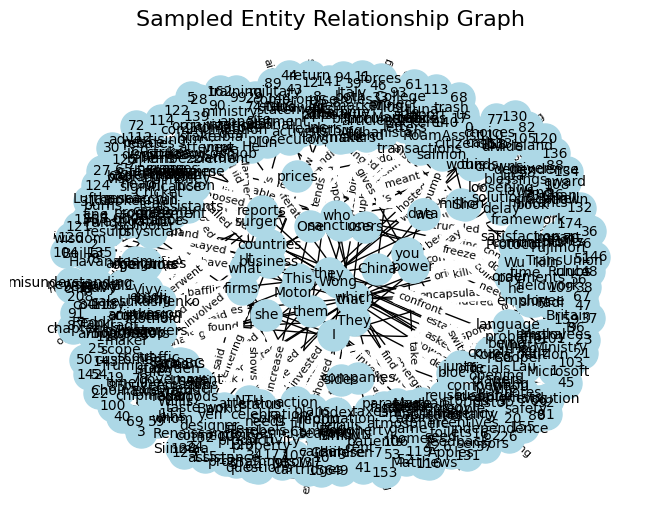

In [78]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the number of relationships to sample
sample_size = 500  # Adjust based on your needs
sampled_relationships = random.sample(
    [rel for relationships in news['relationships'] if isinstance(relationships, list) for rel in relationships],
    min(sample_size, sum(news['num_relationships']))
)

# Create a smaller graph
G_sampled = nx.DiGraph()
for subj, verb, obj_index in sampled_relationships:
    G_sampled.add_edge(subj, obj_index, label=verb)

# Plot the sampled graph
pos = nx.spring_layout(G_sampled)
nx.draw(G_sampled, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=10)
edge_labels = nx.get_edge_attributes(G_sampled, 'label')
nx.draw_networkx_edge_labels(G_sampled, pos, edge_labels=edge_labels, font_size=8)
plt.title("Sampled Entity Relationship Graph", fontsize=16)
plt.show()


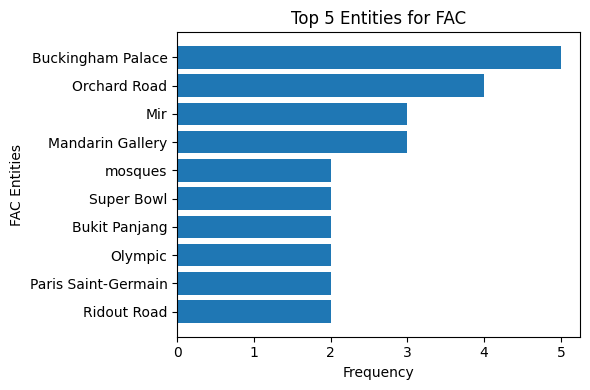

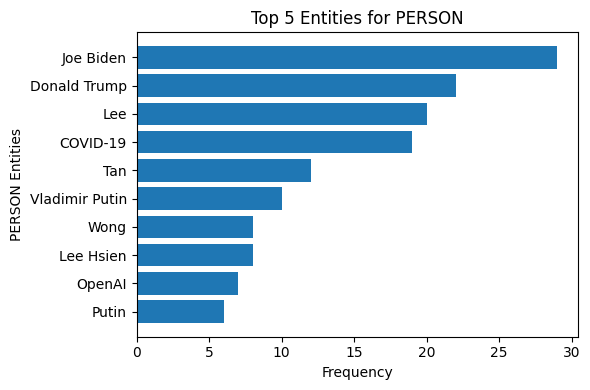

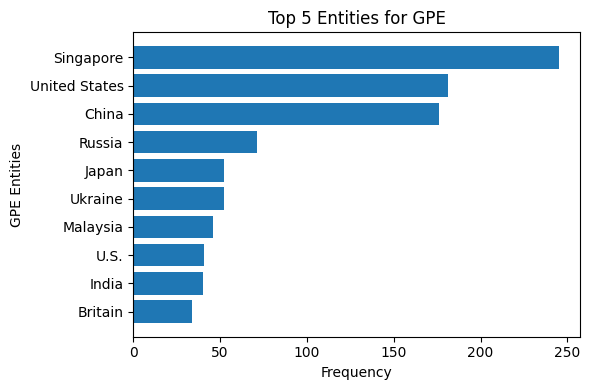

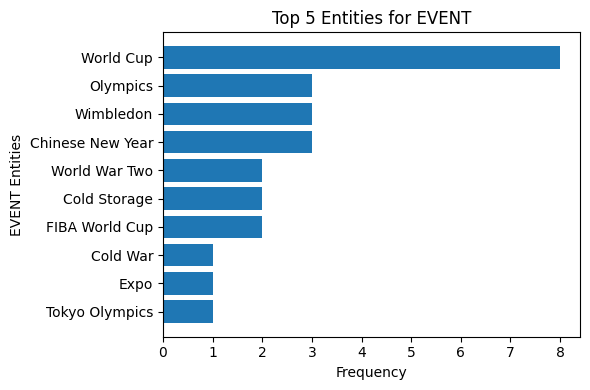

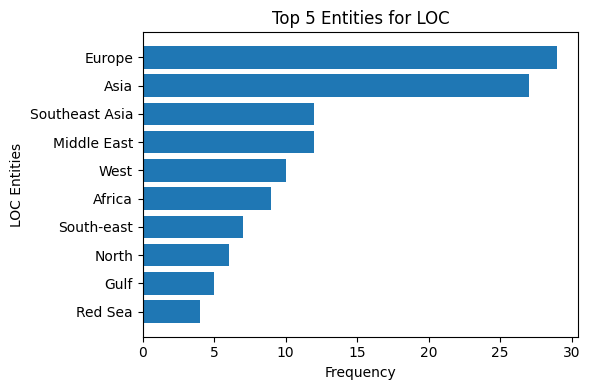

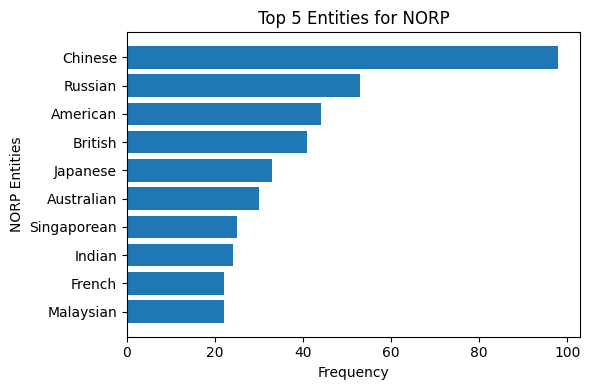

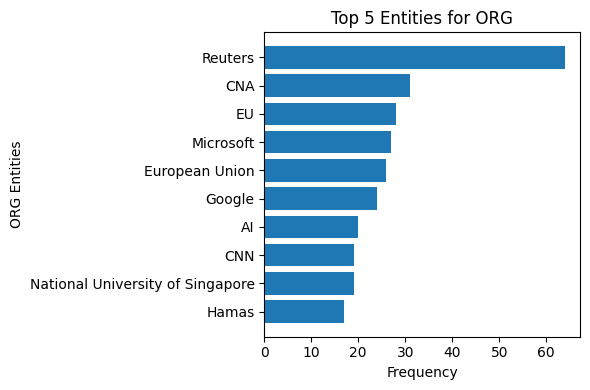

In [50]:
# Filter to focus only on the selected important entity types
important_types = {"ORG", "GPE", "PERSON", "NORP", "FAC", "LOC", "EVENT"}

# Initialize counters for each entity type
entity_counters = {etype: Counter() for etype in important_types}

# Extract the counts for only the selected entity types
for entities in news['entities']:
    for entity, entity_type in entities:
        if entity_type in important_types:
            entity_counters[entity_type][entity] += 1

# Visualize top 5 entities for the selected important types
for entity_type, counter in entity_counters.items():
    top_5_entities = counter.most_common(10)
    entities, counts = zip(*top_5_entities) if top_5_entities else ([], [])

    # Plot the top 5 entities for this type
    plt.figure(figsize=(6, 4))
    plt.barh(entities, counts)
    plt.title(f"Top 5 Entities for {entity_type}")
    plt.xlabel("Frequency")
    plt.ylabel(f"{entity_type} Entities")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


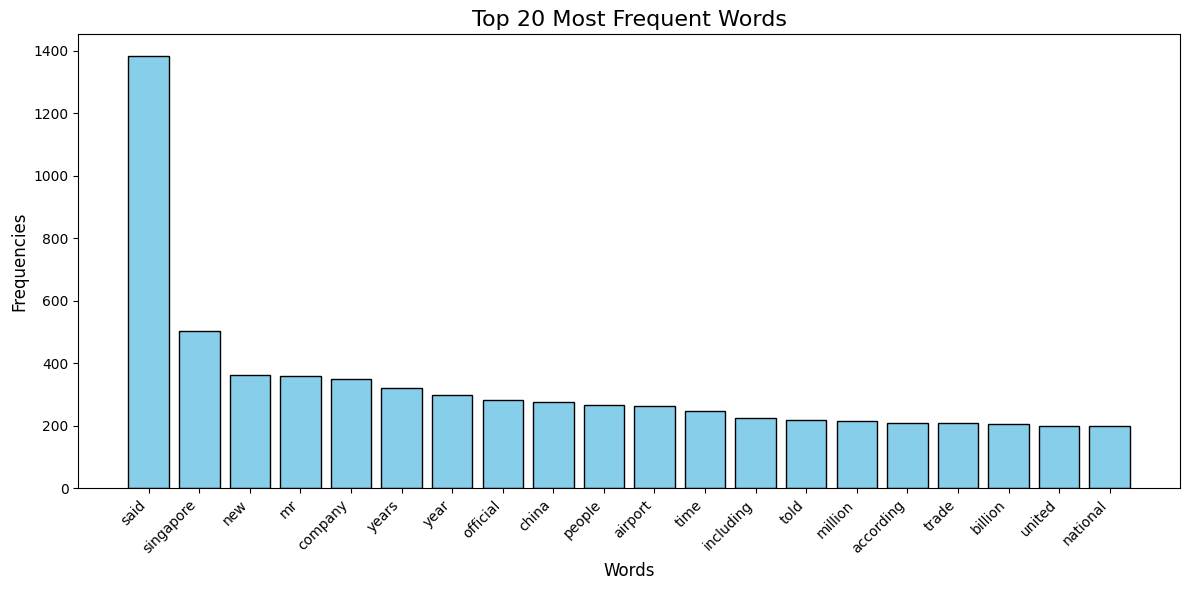

In [46]:
import re
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt

# Combine the text columns from both datasets
combined_text = pd.concat([wikileaks['Text'], news['Text']], ignore_index=True)

# Function to preprocess text
def preprocess_text_simple(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Tokenize text by splitting on whitespace
    tokens = text.split()
    # Remove stopwords using sklearn's stopword set
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]
    return tokens

# Preprocess and tokenize all text
all_tokens_simple = []
for text in combined_text.dropna():
    all_tokens_simple.extend(preprocess_text_simple(text))

# Count word frequencies
word_freq_simple = Counter(all_tokens_simple)

# Get the 20 most common words
most_common_words = word_freq_simple.most_common(20)

# Visualization: Bar Chart
words, frequencies = zip(*most_common_words)
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Frequent Words', fontsize=16)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequencies', fontsize=12)
plt.tight_layout()
plt.show()


# Cross datasets analysis

In [50]:
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm
import pandas as pd

threshold = 0.5  # Adjust as needed for similarity test

# Preprocess text (lowercase and strip)
def preprocess_text(text):
    return text.lower().strip()

# Preprocess text for embedding
print("Preprocessing text...")
news['processed_text'] = news['Text'].apply(preprocess_text)
wikileaks['processed_text'] = wikileaks['Text'].apply(preprocess_text)

# Embed text using Sentence Transformers
print("Generating embeddings...")
model = SentenceTransformer('all-MiniLM-L6-v2')
news_embeddings = model.encode(news['processed_text'].tolist(), convert_to_tensor=True)
wikileaks_embeddings = model.encode(wikileaks['processed_text'].tolist(), convert_to_tensor=True)

# Calculate cosine similarity
print("Calculating cosine similarity...")
similarity_matrix = util.pytorch_cos_sim(news_embeddings, wikileaks_embeddings)

# Find relationships above a similarity threshold
print("Finding relationships above the similarity threshold...")

relationships = []

# Iterate through the similarity matrix with progress bar
for i, row in enumerate(tqdm(similarity_matrix, desc="Processing rows in similarity matrix")):
    for j, sim in enumerate(row):
        if sim > threshold:  # Check if similarity score exceeds the threshold
            relationships.append({
                "news_text": news.iloc[i]['Text'],
                "wikileaks_text": wikileaks.iloc[j]['Text'],
                "similarity_score": sim.item()
            })

# Convert relationships to a DataFrame and save
print("Saving results to Excel...")
relationships_df = pd.DataFrame(relationships)
relationships_df.to_excel('news_wikileaks_similarity.xlsx', index=False)

print("Similarity comparison completed and results saved to 'news_wikileaks_similarity.xlsx'.")


Preprocessing text...
Generating embeddings...
Calculating cosine similarity...
Finding relationships above the similarity threshold...


Processing rows in similarity matrix: 100%|██████████| 1506/1506 [00:00<00:00, 1696.04it/s]

Saving results to Excel...
Similarity comparison completed and results saved to 'news_wikileaks_similarity.xlsx'.


In [51]:
print(similarity_matrix)

tensor([[0.0711, 0.2610, 0.1596,  ..., 0.1170, 0.0898, 0.1846],
        [0.1731, 0.4160, 0.0499,  ..., 0.2591, 0.2437, 0.1946],
        [0.0809, 0.1936, 0.0714,  ..., 0.2063, 0.1922, 0.3282],
        ...,
        [0.1495, 0.2340, 0.1088,  ..., 0.2388, 0.1975, 0.1826],
        [0.1266, 0.0959, 0.0621,  ..., 0.1922, 0.1752, 0.0482],
        [0.1384, 0.2854, 0.2461,  ..., 0.1808, 0.1634, 0.0850]])


In [52]:
max_score = similarity_matrix.max().item()
min_score = similarity_matrix.min().item()
print(f"Max similarity score: {max_score}, Min similarity score: {min_score}")


Max similarity score: 0.6804146766662598, Min similarity score: -0.23650339245796204


In [29]:
# Debugging
print("Validated Data Sample:")
print(validated_data[['Text', 'processed_text']].head())

print("Wikilinks Data Sample:")
print(wikilinks[['Text', 'processed_text']].head())

# Check similarity scores
similarity_matrix = util.pytorch_cos_sim(validated_embeddings, wikilinks_embeddings)
print("Similarity Matrix:")
print(similarity_matrix)

# Check threshold adjustment
threshold = 0.5  # Adjusted threshold
relationships = []
for i, row in enumerate(similarity_matrix):
    for j, sim in enumerate(row):
        if sim > threshold:
            print(f"Match: {validated_data.iloc[i]['Text']} <-> {wikilinks.iloc[j]['Text']}, Score: {sim.item()}")
            relationships.append({
                "validated_text": validated_data.iloc[i]['Text'],
                "wikilink_text": wikilinks.iloc[j]['Text'],
                "similarity_score": sim.item()
            })

# Check results
print(f"Total relationships found: {len(relationships)}")

# Save results
if relationships:
    relationships_df = pd.DataFrame(relationships)
    relationships_df.to_excel('relationships_output.xlsx', index=False)
    print("Relationships saved to 'relationships_output.xlsx'")
else:
    print("No relationships found. Consider adjusting the threshold.")


Validated Data Sample:
                                                Text  \
0  Starbucks violated federal labor law when it i...   
1  The first suspect to plead guilty in Singapore...   
2  Meta has been fined a record-breaking €1.2 bil...   
3  SINGAPORE: A 45-year-old man linked to Singapo...   
4  The Department of Education imposed a record $...   

                                      processed_text  
0  starbucks violated federal labor law when it i...  
1  the first suspect to plead guilty in singapore...  
2  meta has been fined a record-breaking €1.2 bil...  
3  singapore: a 45-year-old man linked to singapo...  
4  the department of education imposed a record $...  
Wikilinks Data Sample:
                                                Text  \
0  Pristina Airport – Possible administrative irr...   
1  Investigative details\n\nIn his/her interviews...   
2  "An interoffice memorandum providing an “outst...   
3  "Allegation 2 & 3:\n\n(Specifically, three of ...   
4  "Whe

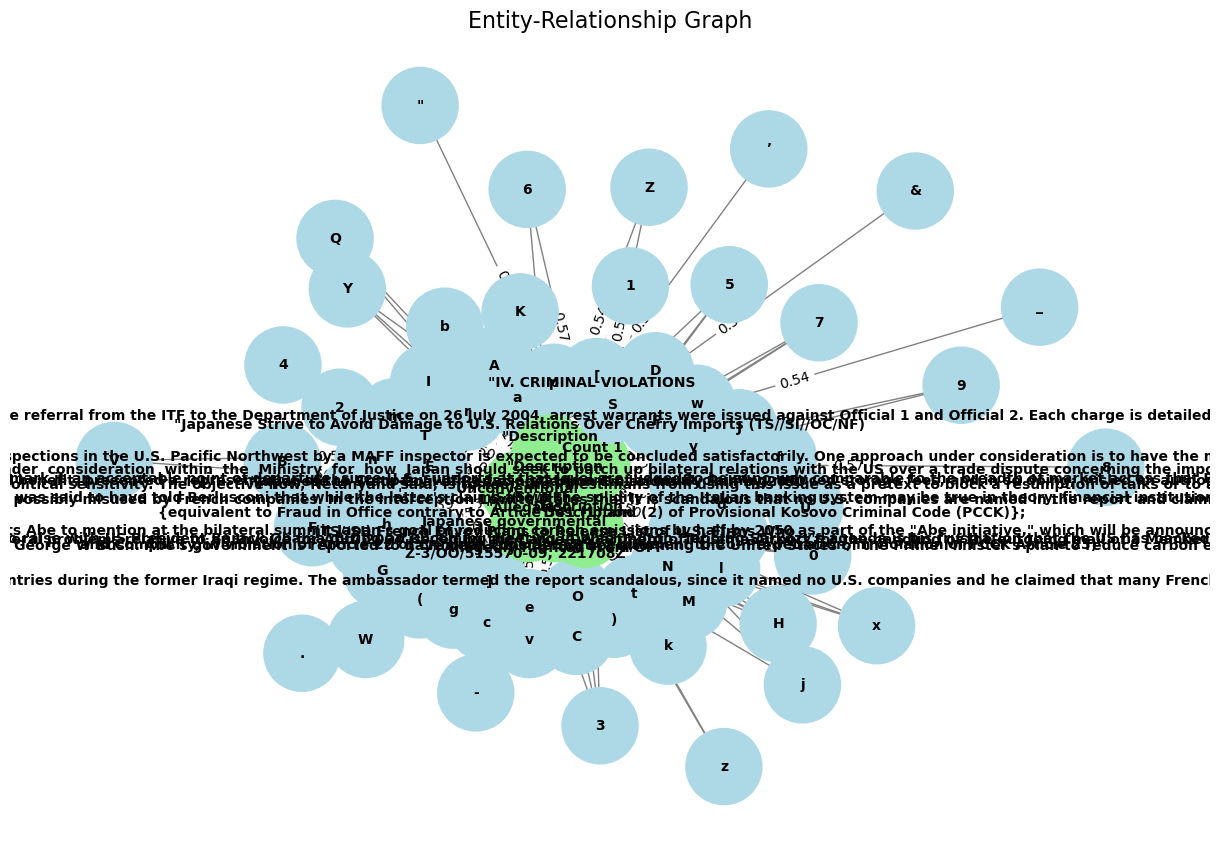

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Extract entities from validated_data and relationships
entity_relationships = []
for relationship in relationships:
    validated_text = relationship['validated_text']
    wikilink_text = relationship['wikilink_text']
    similarity_score = relationship['similarity_score']

    # Extract entities for the validated text
    validated_entities = validated_data[validated_data['Text'] == validated_text]['entities'].values
    if len(validated_entities) > 0:
        entities = validated_entities[0]  # Assuming entities are stored as a list
        for entity in entities:
            entity_relationships.append({
                "entity": entity,
                "related_text": wikilink_text,
                "similarity_score": similarity_score
            })

# Step 2: Create a graph using NetworkX
G = nx.Graph()

# Add nodes and edges
for relationship in entity_relationships:
    entity = relationship['entity']
    related_text = relationship['related_text']
    score = relationship['similarity_score']

    # Add nodes
    G.add_node(entity, type='entity')
    G.add_node(related_text, type='text')

    # Add edges with similarity score as weight
    G.add_edge(entity, related_text, weight=score)

# Step 3: Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for consistent positioning
node_colors = ['lightblue' if G.nodes[node]['type'] == 'entity' else 'lightgreen' for node in G]

nx.draw(
    G, pos,
    with_labels=True,
    node_color=node_colors,
    edge_color='gray',
    font_size=10,
    node_size=3000,
    font_weight='bold'
)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)})
plt.title("Entity-Relationship Graph", fontsize=16)
plt.show()


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



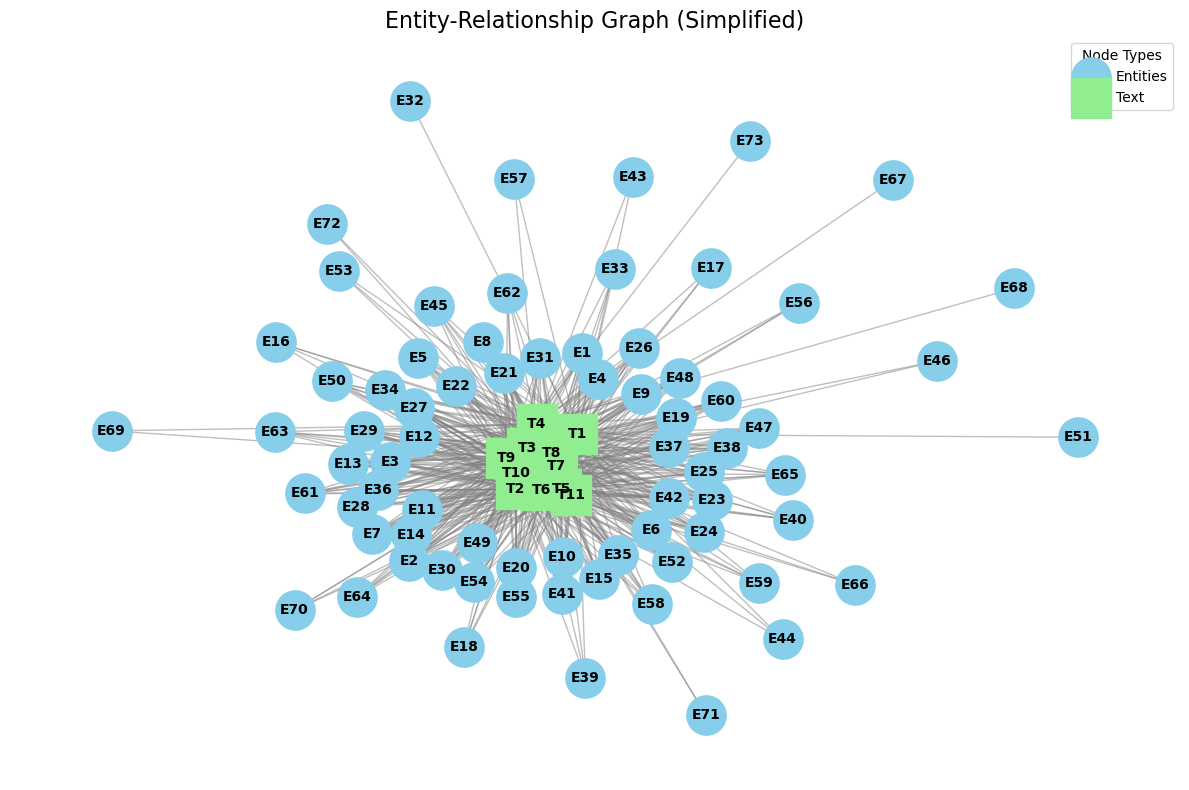

In [33]:
import matplotlib.pyplot as plt
import networkx as nx

# Step 1: Build the graph
G = nx.Graph()

# Add nodes and edges
node_mapping = {}  # To map entities/text to simple labels
entity_counter = 1
text_counter = 1

for relationship in entity_relationships:
    entity = relationship['entity']
    related_text = relationship['related_text']
    score = relationship['similarity_score']

    # Create short labels for entities and texts
    if entity not in node_mapping:
        node_mapping[entity] = f"E{entity_counter}"
        entity_counter += 1
    if related_text not in node_mapping:
        node_mapping[related_text] = f"T{text_counter}"
        text_counter += 1

    # Add nodes and edges with simplified labels
    G.add_node(node_mapping[entity], type='entity')
    G.add_node(node_mapping[related_text], type='text')
    G.add_edge(node_mapping[entity], node_mapping[related_text], weight=score)

# Step 2: Print full details separately
print("Full Details of Relationships:")
for relationship in entity_relationships:
    entity = relationship['entity']
    related_text = relationship['related_text']
    score = relationship['similarity_score']
    print(f"Entity: {entity} -> Text: {related_text} (Similarity: {score:.2f})")

# Step 3: Define colors and labels for graph
pos = nx.spring_layout(G, seed=42)  # Layout for better spacing
node_colors = [
    'skyblue' if G.nodes[node]['type'] == 'entity' else 'lightgreen' for node in G
]

# Step 4: Plot the simplified graph
plt.figure(figsize=(12, 8))

# Draw nodes and edges
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray')
nx.draw_networkx_nodes(
    G, pos,
    nodelist=[node for node in G if G.nodes[node]['type'] == 'entity'],
    node_color='skyblue',
    node_shape='o',
    label='Entities',
    node_size=800
)
nx.draw_networkx_nodes(
    G, pos,
    nodelist=[node for node in G if G.nodes[node]['type'] == 'text'],
    node_color='lightgreen',
    node_shape='s',
    label='Text',
    node_size=800
)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Add legend
plt.legend(scatterpoints=1, loc='upper right', fontsize=10, title="Node Types")
plt.title("Entity-Relationship Graph (Simplified)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


In [34]:
# Print a sample of relationships
print("Full Details of Relationships (Showing first 20 relationships):")
for i, relationship in enumerate(entity_relationships[:20]):
    entity = relationship['entity']
    related_text = relationship['related_text']
    score = relationship['similarity_score']
    print(f"{i + 1}. Entity: {entity} -> Text: {related_text} (Similarity: {score:.2f})")

if len(entity_relationships) > 20:
    print(f"... and {len(entity_relationships) - 20} more relationships.")

    

Full Details of Relationships (Showing first 20 relationships):
1. Entity: [ -> Text: "IV. CRIMINAL VIOLATIONS

Based on the referral from the ITF to the Department of Justice on 26 July 2004, arrest warrants were issued against Official 1 and Official 2. Each charge is detailed below:

Count 1

That between the dates 14th March 2004 and 16th March 2004 inclusive, Official 1 and Official 2 acting in their capacity as officials of Airport Pristina, and acting in complicity with the intention to obtain an unlawful material benefit, presented a representative of the Company with a false statement of account claiming reduced storage fees, and in so doing, misled an authorized person to carry out an unlawful payment, thereby committing the offence of Fraud in Service in violation of Article 215, (1) and (2) of the Kosovo Criminal Code (KCC) punishable by imprisonment of one to ten years

{equivalent to Fraud in Office contrary to Article 341 (1) and (2) of Provisional Kosovo Criminal Code (

/var/folders/4z/7zn1mj8s7t747c4bbyygl8rh0000gn/T/ipykernel_62912/1343895597.py:33: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=weights, edge_cmap=plt.cm.Blues)


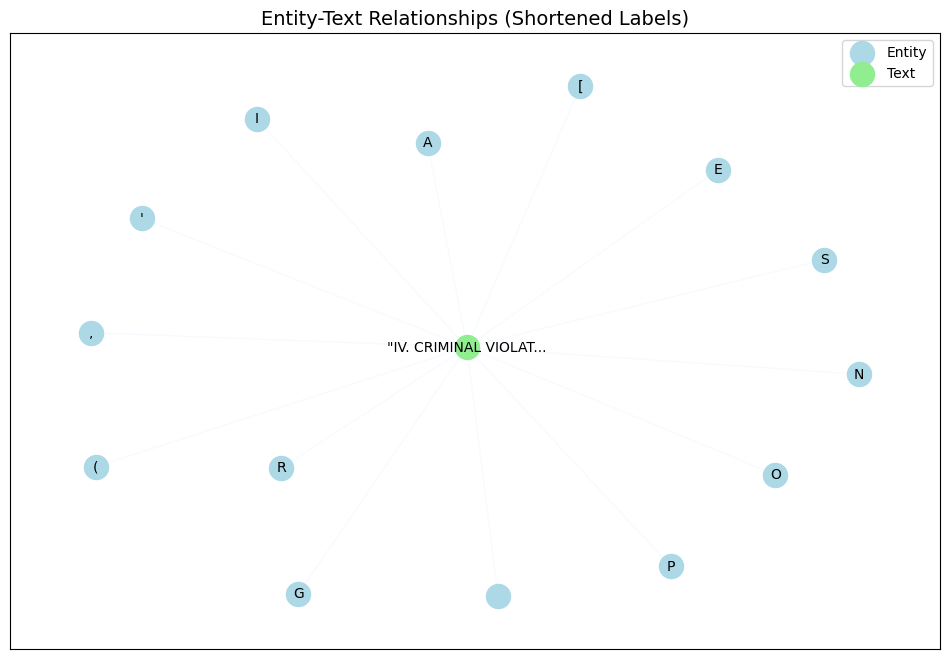

Full details saved to 'entity_relationships_details.txt'


In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# Shortened version for node labels
def shorten_text(text, max_length=20):
    return text if len(text) <= max_length else text[:max_length] + "..."

# Create a graph
G = nx.Graph()

# Add nodes and edges
for relationship in entity_relationships[:20]:  # Display only the first 20 for clarity
    entity = relationship['entity']
    related_text = relationship['related_text']
    similarity = relationship['similarity_score']
    G.add_node(entity, type='entity')
    G.add_node(shorten_text(related_text), type='text')
    G.add_edge(entity, shorten_text(related_text), weight=similarity)

# Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

# Draw nodes with colors based on type
entity_nodes = [node for node, data in G.nodes(data=True) if data['type'] == 'entity']
text_nodes = [node for node, data in G.nodes(data=True) if data['type'] == 'text']
nx.draw_networkx_nodes(G, pos, nodelist=entity_nodes, node_color='lightblue', label='Entity')
nx.draw_networkx_nodes(G, pos, nodelist=text_nodes, node_color='lightgreen', label='Text')

# Draw edges with weights
edges = G.edges(data=True)
weights = [data['weight'] for _, _, data in edges]
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=weights, edge_cmap=plt.cm.Blues)

# Add labels (shortened on graph)
nx.draw_networkx_labels(G, pos, font_size=10)

# Add legend and title
plt.legend(scatterpoints=1, loc='best', labels=['Entity', 'Text'])
plt.title("Entity-Text Relationships (Shortened Labels)", fontsize=14)
plt.show()

# Save the full relationship details to a file
with open("entity_relationships_details.txt", "w") as f:
    for i, relationship in enumerate(entity_relationships[:20]):
        entity = relationship['entity']
        related_text = relationship['related_text']
        score = relationship['similarity_score']
        f.write(f"{i + 1}. Entity: {entity} -> Text: {related_text} (Similarity: {score:.2f})\n")
    if len(entity_relationships) > 20:
        f.write(f"... and {len(entity_relationships) - 20} more relationships.\n")
print("Full details saved to 'entity_relationships_details.txt'")


# Frequency Analysis (Cross Datasets)


In [7]:
pip install mlxtend


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 38.4 MB/s eta 0:00:00 0:00:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
from itertools import combinations
from collections import defaultdict
from mlxtend.frequent_patterns import apriori, association_rules

# Load entity datasets
wikileaks_path = 'processed_wikileaks_parsed.xlsx'
news_path = 'processed_news_excerpts_parsed.xlsx'

wikileaks_df = pd.read_excel(wikileaks_path)
news_df = pd.read_excel(news_path)

# Extract relevant text columns
def extract_entities(df, column_name):
    return [set(entity.split(', ')) for entity in df[column_name].dropna()]

wikileaks_entities = extract_entities(wikileaks_df, 'entities')
news_entities = extract_entities(news_df, 'entities')

# Combine all entities
entity_sets = wikileaks_entities + news_entities

# Convert to a transaction format for Apriori
def transaction_format(entity_sets):
    """Convert entity sets into a transaction dataframe for Apriori."""
    all_items = set().union(*entity_sets)
    transaction_df = pd.DataFrame(
        [{item: (item in entity_set) for item in all_items} for entity_set in entity_sets]
    )
    return transaction_df

transaction_df = transaction_format(entity_sets)

# Parameters for Apriori and Association Rules
min_support = 0.05  # Minimum support threshold
min_confidence = 0.7  # Minimum confidence threshold

# Apply Apriori Algorithm
frequent_itemsets = apriori(transaction_df, min_support=min_support, use_colnames=True)

# Calculate the total number of itemsets (transactions)
num_itemsets = len(transaction_df)

# Generate Association Rules
rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=min_confidence,
    num_itemsets=num_itemsets
)

# Display results
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
      support                                           itemsets
0    0.137659                                     (('Singapore')
1    0.137659                                           (('two')
2    0.770164                                        ('PERSON'))
3    0.070952                                            (('US')
4    0.574287                                      ('CARDINAL'))
..        ...                                                ...
715  0.139478  ('NORP'), 'DATE'), 'CARDINAL'), 'PERSON'), 'GP...
716  0.061856  (('first', 'ORDINAL'), 'DATE'), 'PERSON'), 'GP...
717  0.055185  ('ORDINAL'), 'NORP'), 'DATE'), 'PERSON'), 'GPE...
718  0.053366  ('NORP'), 'DATE'), 'PERSON'), 'GPE'), 'GPE')],...
719  0.052759  (('first', 'ORDINAL'), 'DATE'), 'CARDINAL'), '...

[720 rows x 2 columns]

Association Rules:
                              antecedents  \
0                          (('Singapore')   
1                          (('Singapore')   
2                     

In [16]:
# Save frequent itemsets and association rules to Excel files
output_file_path = "association_analysis_results.xlsx"

with pd.ExcelWriter(output_file_path) as writer:
    frequent_itemsets.to_excel(writer, sheet_name="Frequent_Itemsets", index=False)
    rules.to_excel(writer, sheet_name="Association_Rules", index=False)

print(f"Results saved to {output_file_path}")


Results saved to association_analysis_results.xlsx
